In [99]:
import pandas as pd
import numpy as np
from time import perf_counter 
import struct
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split
# The data, split between train and test sets.
dataset = pd.read_csv('~/Downloads/datafile2.csv').drop(['Unnamed: 0'], axis=1)
target = dataset["label"]
data = dataset.drop(["label"], axis=1)
# convert dataframe to numpy array for furthur processing
data = data.to_numpy()
#target = target.to_numpy()

In [100]:
x_train, x_test, y_train, y_test = train_test_split(data,
    target.astype("int"), test_size=0.20, random_state=42)

Text(0.5, 1.0, 'Distribution of Urdu Digits in Dataset')

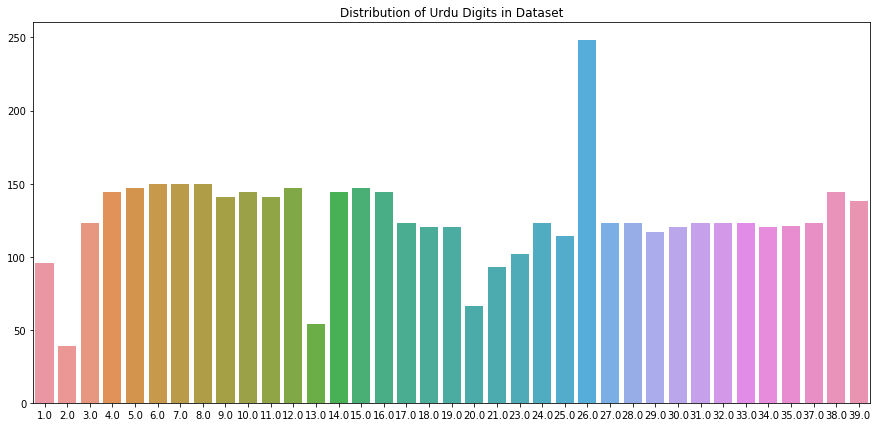

In [101]:
# plot for counting target variable size
import seaborn as sns
lab, val = np.unique(target,return_counts=True)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))
sns.barplot(lab,val)
plt.title('Distribution of Urdu Digits in Dataset')

In [103]:
knn_predictions = []
def urdu_knn():
  
    start_time=perf_counter()
    
    
    # Train the model
    clf= knn(n_neighbors=5)
    clf.fit(x_train,y_train)

    # Test the test examples
    prediction = clf.predict(x_test)
    accuracy=np.sum(np.equal(prediction,y_test))/len(y_test)
    print("Accuracy:",accuracy*100)
    knn_predictions.append(prediction)
 
    
    end_time=perf_counter() 
    print("Time cost:",(end_time-start_time)/60,"minutes")
    return accuracy,(end_time-start_time)/60
    return prediction
    
if __name__=="__main__":
    urdu_knn()

Accuracy: 40.68522483940043
Time cost: 0.2757734449667017 minutes


In [104]:
string = target.unique()
string = string.astype('int')
string = str(string)

In [105]:
knn_predictions = np.array(knn_predictions)
knn_predictions = knn_predictions.transpose()

In [106]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, knn_predictions))

[[14  0  0 ...  0  0  0]
 [ 0  3  1 ...  0  0  0]
 [ 0  3  8 ...  0  0  0]
 ...
 [ 0  0  0 ... 15  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  1  0 ...  0  0 11]]


In [107]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           1       0.56      0.67      0.61        21
           2       0.38      0.50      0.43         6
           3       0.53      0.29      0.37        28
           4       0.11      0.68      0.19        34
           5       0.64      0.45      0.53        31
           6       0.36      0.45      0.40        29
           7       0.54      0.59      0.56        34
           8       0.62      0.25      0.36        32
           9       0.40      0.41      0.41        29
          10       0.57      0.30      0.39        40
          11       0.38      0.72      0.49        29
          12       0.76      0.57      0.65        28
          13       0.38      0.60      0.46        10
          14       0.21      0.64      0.31        28
          15       0.53      0.52      0.52        33
          16       0.24      0.73      0.36        22
          17       0.50      0.19      0.28        31
          18       0.44    

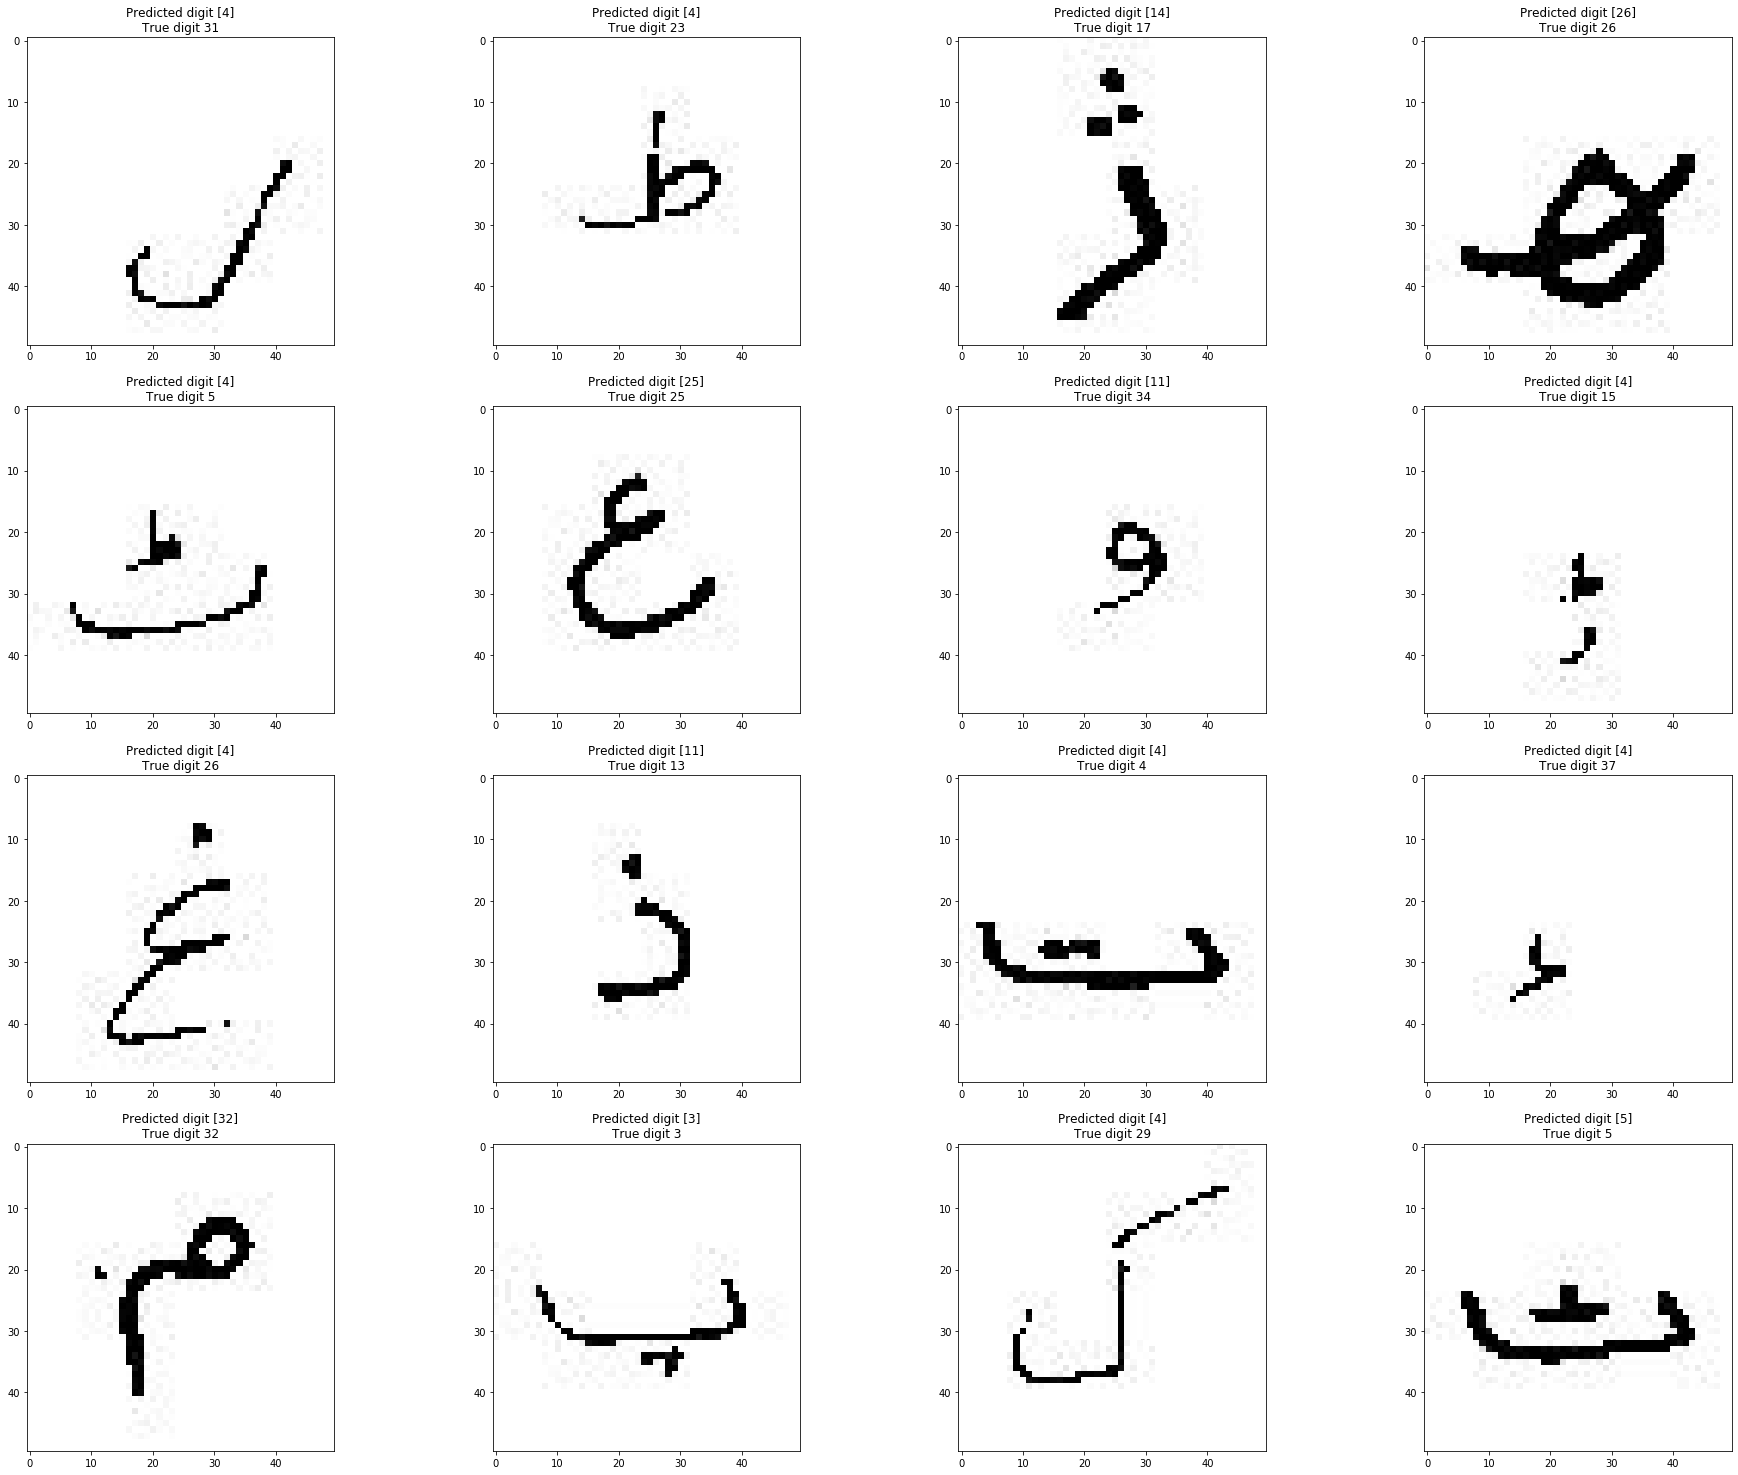

In [108]:
# Convert y_test to numpy array
y_test = np.array(y_test)
# Show 25 digits of data predicted by svm
fig, axis = plt.subplots(4, 4, figsize=(32, 26))

for i, ax in enumerate(axis.flat):
    ax.imshow(x_test[i].reshape(50, 50), cmap='binary')
    #ax.set(title = "KNN : predicted digit is {}".format(predictions[i]))
    ax.set(title = "Predicted digit {0}\nTrue digit {1}".format(knn_predictions[i], y_test[i]))

In [109]:
from sklearn import svm
svm_predictions = []
def urdu_svm():
    
    
    start_time=perf_counter()
    
    clf=svm.SVC(C=100.,kernel='rbf',gamma=0.01)
    clf.fit(x_train,y_train)
    prediction=clf.predict(x_test)
    svm_predictions.append(prediction)
    
    accuracy=np.sum(np.equal(prediction,y_test))/len(y_test)
    print("Accuracy:",accuracy * 100)
    
    end_time=perf_counter()
    print("Time cost:",(end_time-start_time)/60,"minutes")
    return accuracy,(end_time-start_time)/60
    
if __name__=='__main__':
    urdu_svm()

Accuracy: 96.68094218415418
Time cost: 0.5138584845000271 minutes


In [110]:
svm_predictions = np.array(svm_predictions)
svm_predictions = svm_predictions.transpose()

In [111]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, svm_predictions))

[[21  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0 25 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 26  0]
 [ 0  0  0 ...  0  0 25]]


In [112]:
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         6
           3       1.00      0.89      0.94        28
           4       1.00      1.00      1.00        34
           5       1.00      1.00      1.00        31
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        34
           8       1.00      0.91      0.95        32
           9       1.00      1.00      1.00        29
          10       1.00      1.00      1.00        40
          11       1.00      1.00      1.00        29
          12       1.00      0.79      0.88        28
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        28
          15       1.00      1.00      1.00        33
          16       1.00      1.00      1.00        22
          17       1.00      0.90      0.95        31
          18       1.00    

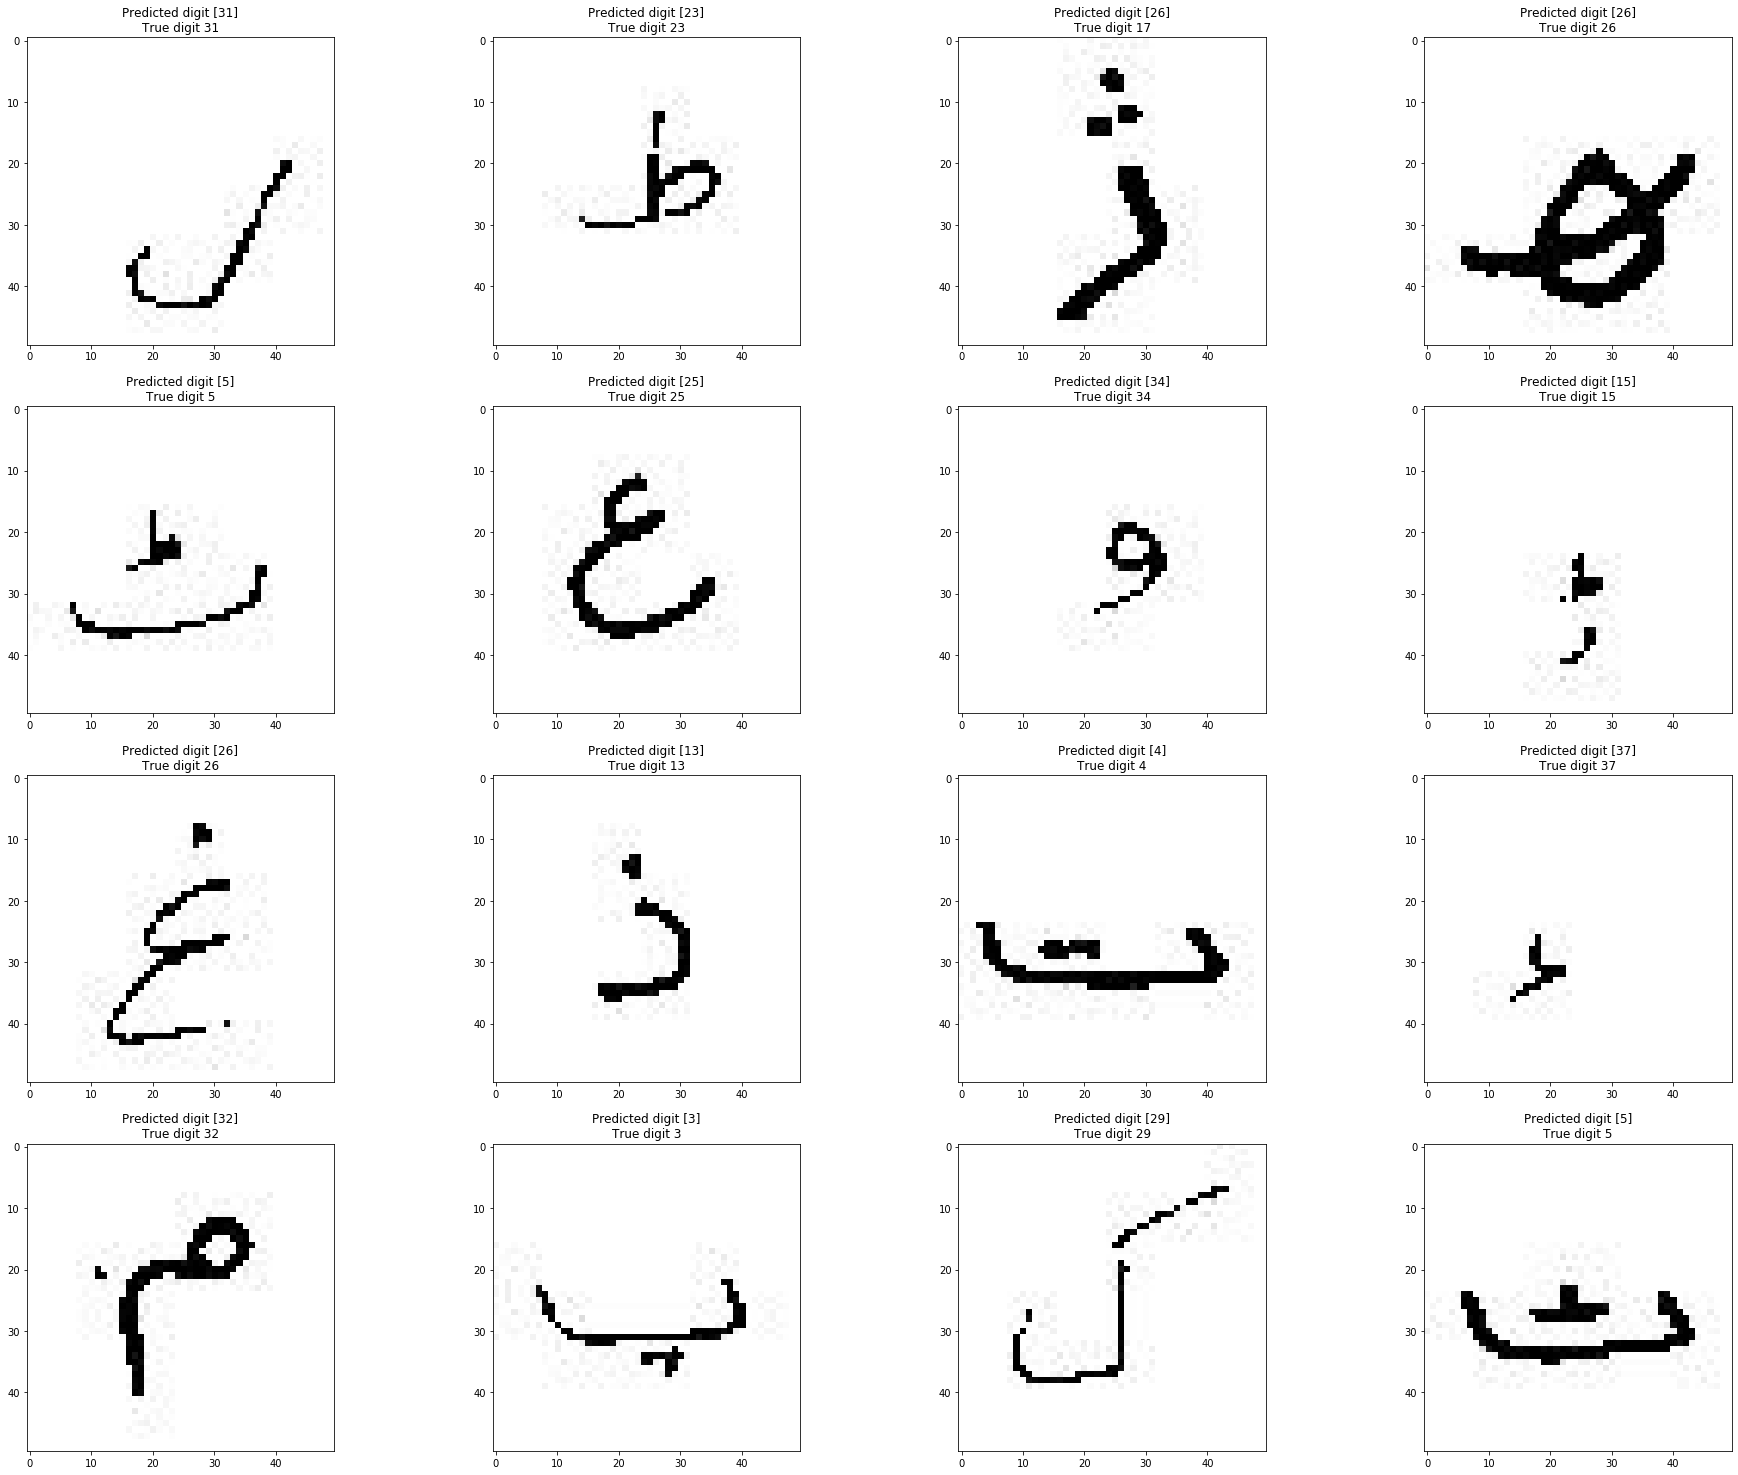

In [113]:
# Convert y_test to numpy array
y_test = np.array(y_test)
# Show 25 digits of data predicted by svm
fig, axis = plt.subplots(4, 4, figsize=(32, 26))

for i, ax in enumerate(axis.flat):
    ax.imshow(x_test[i].reshape(50, 50), cmap='binary')
    #ax.set(title = "SVM : predicted digit is {}".format(predictions[i]))
    ax.set(title = "Predicted digit {0}\nTrue digit {1}".format(svm_predictions[i], y_test[i]))

In [114]:
import graphviz

In [115]:
from sklearn import tree
import pydotplus
import os
import numpy as np

In [116]:
# Decision Trees (DTs) are a non-parametric supervised learning method 
# used for classification and regression.

tree_predictions = []

def urdu_dt():
    
    print("x_train_shape:",x_train.shape)
    print("y_train_shape:",y_train.shape)
    print("x_test_shape:",x_test.shape)
    print("y_test_shape:",y_test.shape)
    
    start_time=perf_counter()
    clf = tree.DecisionTreeClassifier(criterion='gini',splitter="random")
    clf.fit(x_train, y_train)
    
    with open("urdu.dot", 'w') as f:
        f = tree.export_graphviz(clf, out_file=f)
        
    dot_data = tree.export_graphviz(clf, out_file=None,
                             #feature_names=iris.feature_names,
                             class_names=[x for x in string],
                             filled=True, rounded=True,
                             special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    
    graph.write_pdf("DT.pdf")
    
    prediction = clf.predict(x_test)
    tree_predictions.append(prediction)

    accuracy = np.sum(np.equal(prediction, y_test)) / len(y_test)    
    print('accuracy : ', accuracy *100)
    end_time=perf_counter()
    print("Time cost:",(end_time-start_time)/60,'minutes')
    return accuracy,(end_time-start_time)/60
    
if __name__ == '__main__':
    urdu_dt()

x_train_shape: (3734, 2500)
y_train_shape: (3734,)
x_test_shape: (934, 2500)
y_test_shape: (934,)
accuracy :  97.32334047109208
Time cost: 0.4175651422166993 minutes


In [84]:
tree_predictions = np.array(tree_predictions)
tree_predictions = tree_predictions.transpose()

In [85]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, tree_predictions))

[[21  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0 25 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 26  0]
 [ 0  0  0 ...  0  0 25]]


In [86]:
print(classification_report(y_test, tree_predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       0.67      1.00      0.80         6
           3       1.00      0.89      0.94        28
           4       0.92      1.00      0.96        34
           5       1.00      1.00      1.00        31
           6       1.00      1.00      1.00        29
           7       0.92      1.00      0.96        34
           8       1.00      0.91      0.95        32
           9       0.91      1.00      0.95        29
          10       1.00      1.00      1.00        40
          11       1.00      1.00      1.00        29
          12       1.00      0.79      0.88        28
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        28
          15       0.85      1.00      0.92        33
          16       1.00      1.00      1.00        22
          17       1.00      1.00      1.00        31
          18       0.88    

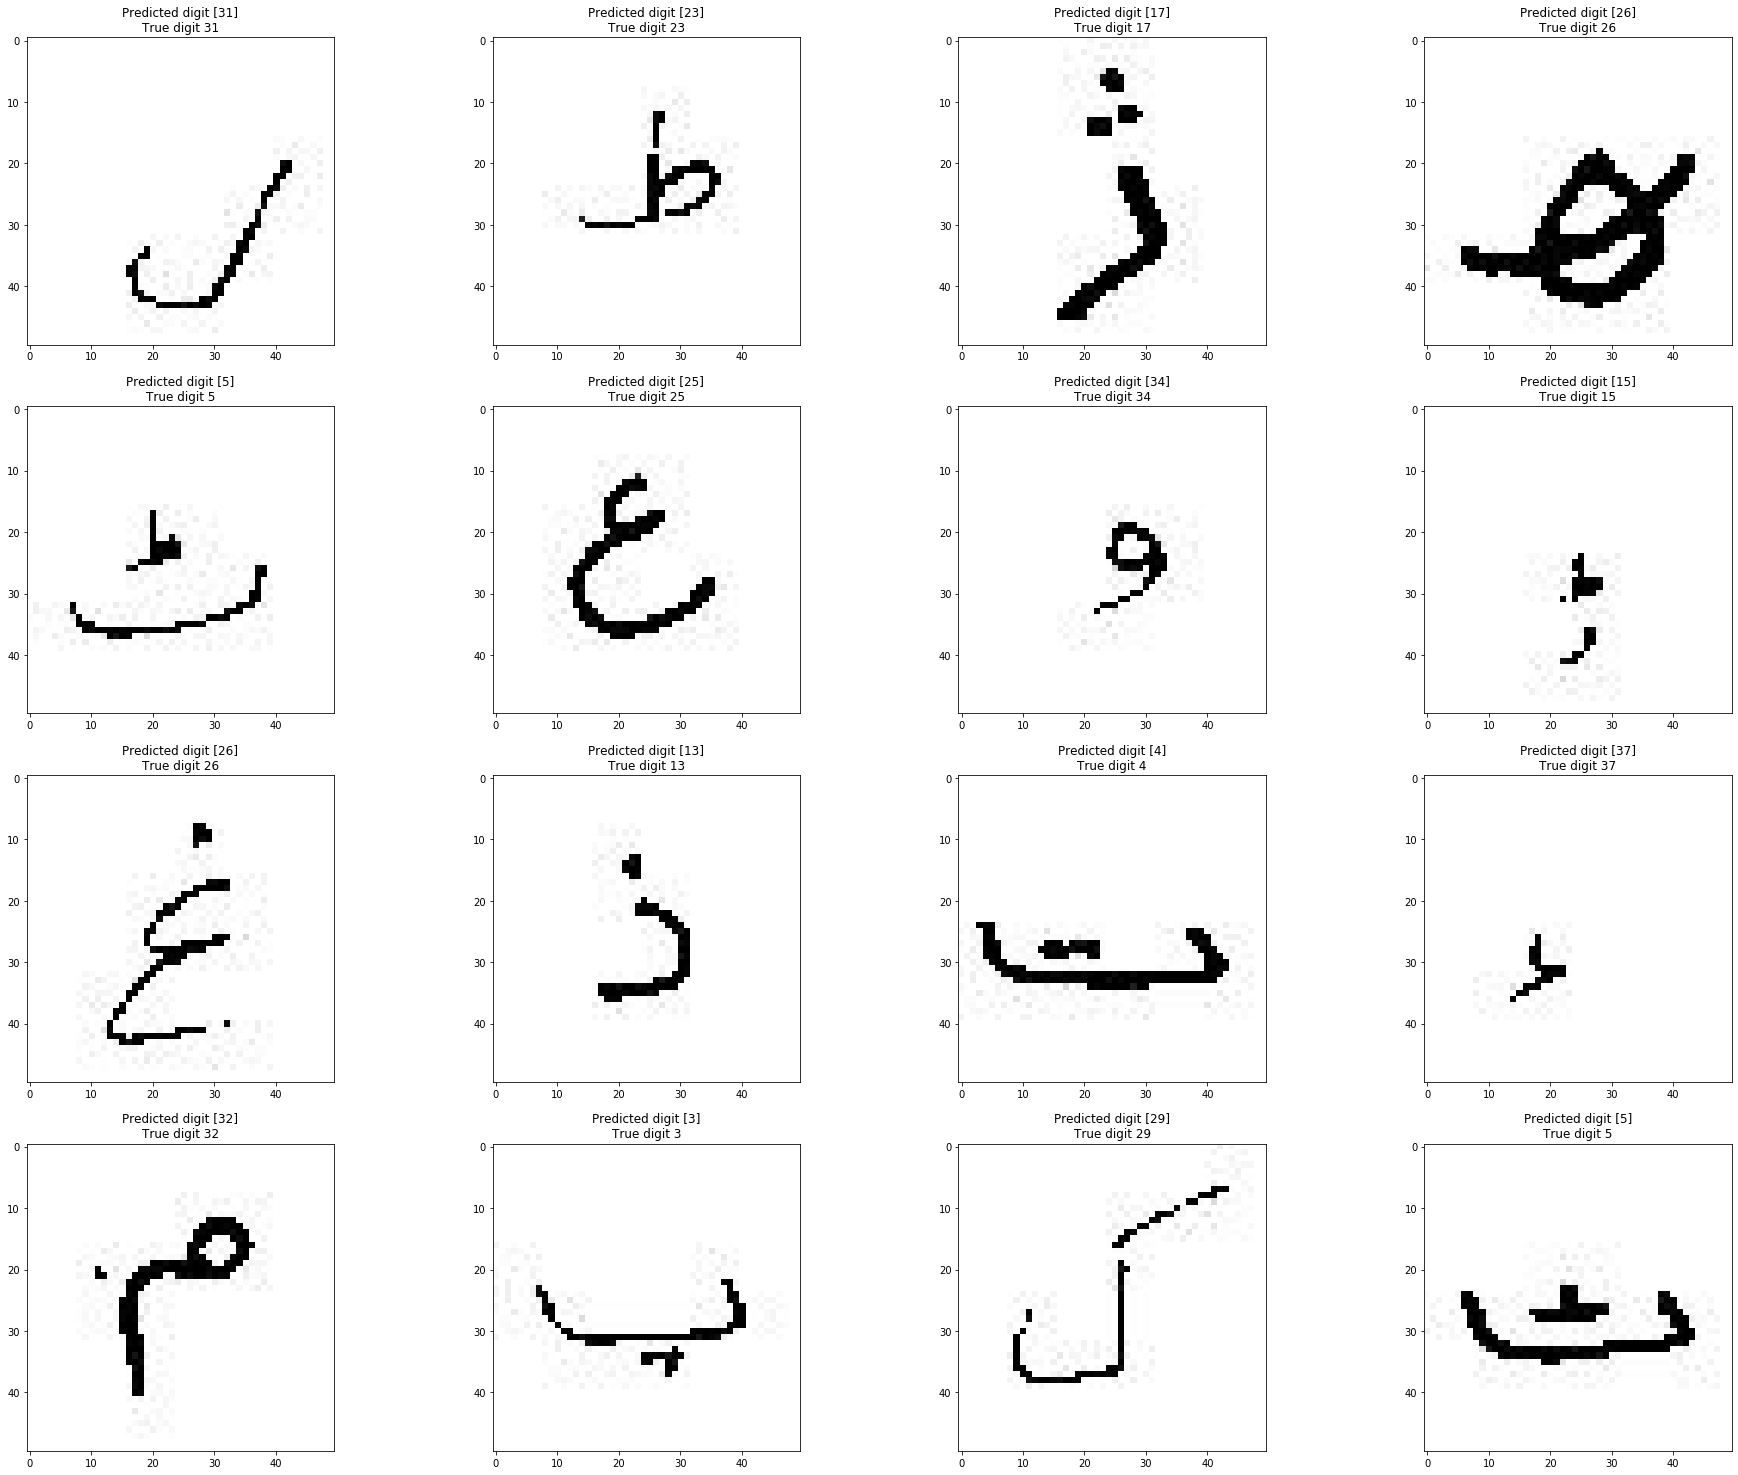

In [87]:
# Convert y_test to numpy array
y_test = np.array(y_test)
# Show 25 digits of data predicted by svm
fig, axis = plt.subplots(4, 4, figsize=(32, 26))

for i, ax in enumerate(axis.flat):
    ax.imshow(x_test[i].reshape(50, 50), cmap='binary')
    #ax.set(title = "SVM : predicted digit is {}".format(predictions[i]))
    ax.set(title = "Predicted digit {0}\nTrue digit {1}".format(tree_predictions[i], y_test[i]))

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=1000)

In [90]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [91]:
rfc.score(x_test, y_test)

0.9796573875802997

In [92]:
y_predict = rfc.predict(x_test)
probability = rfc.predict_proba(x_test)

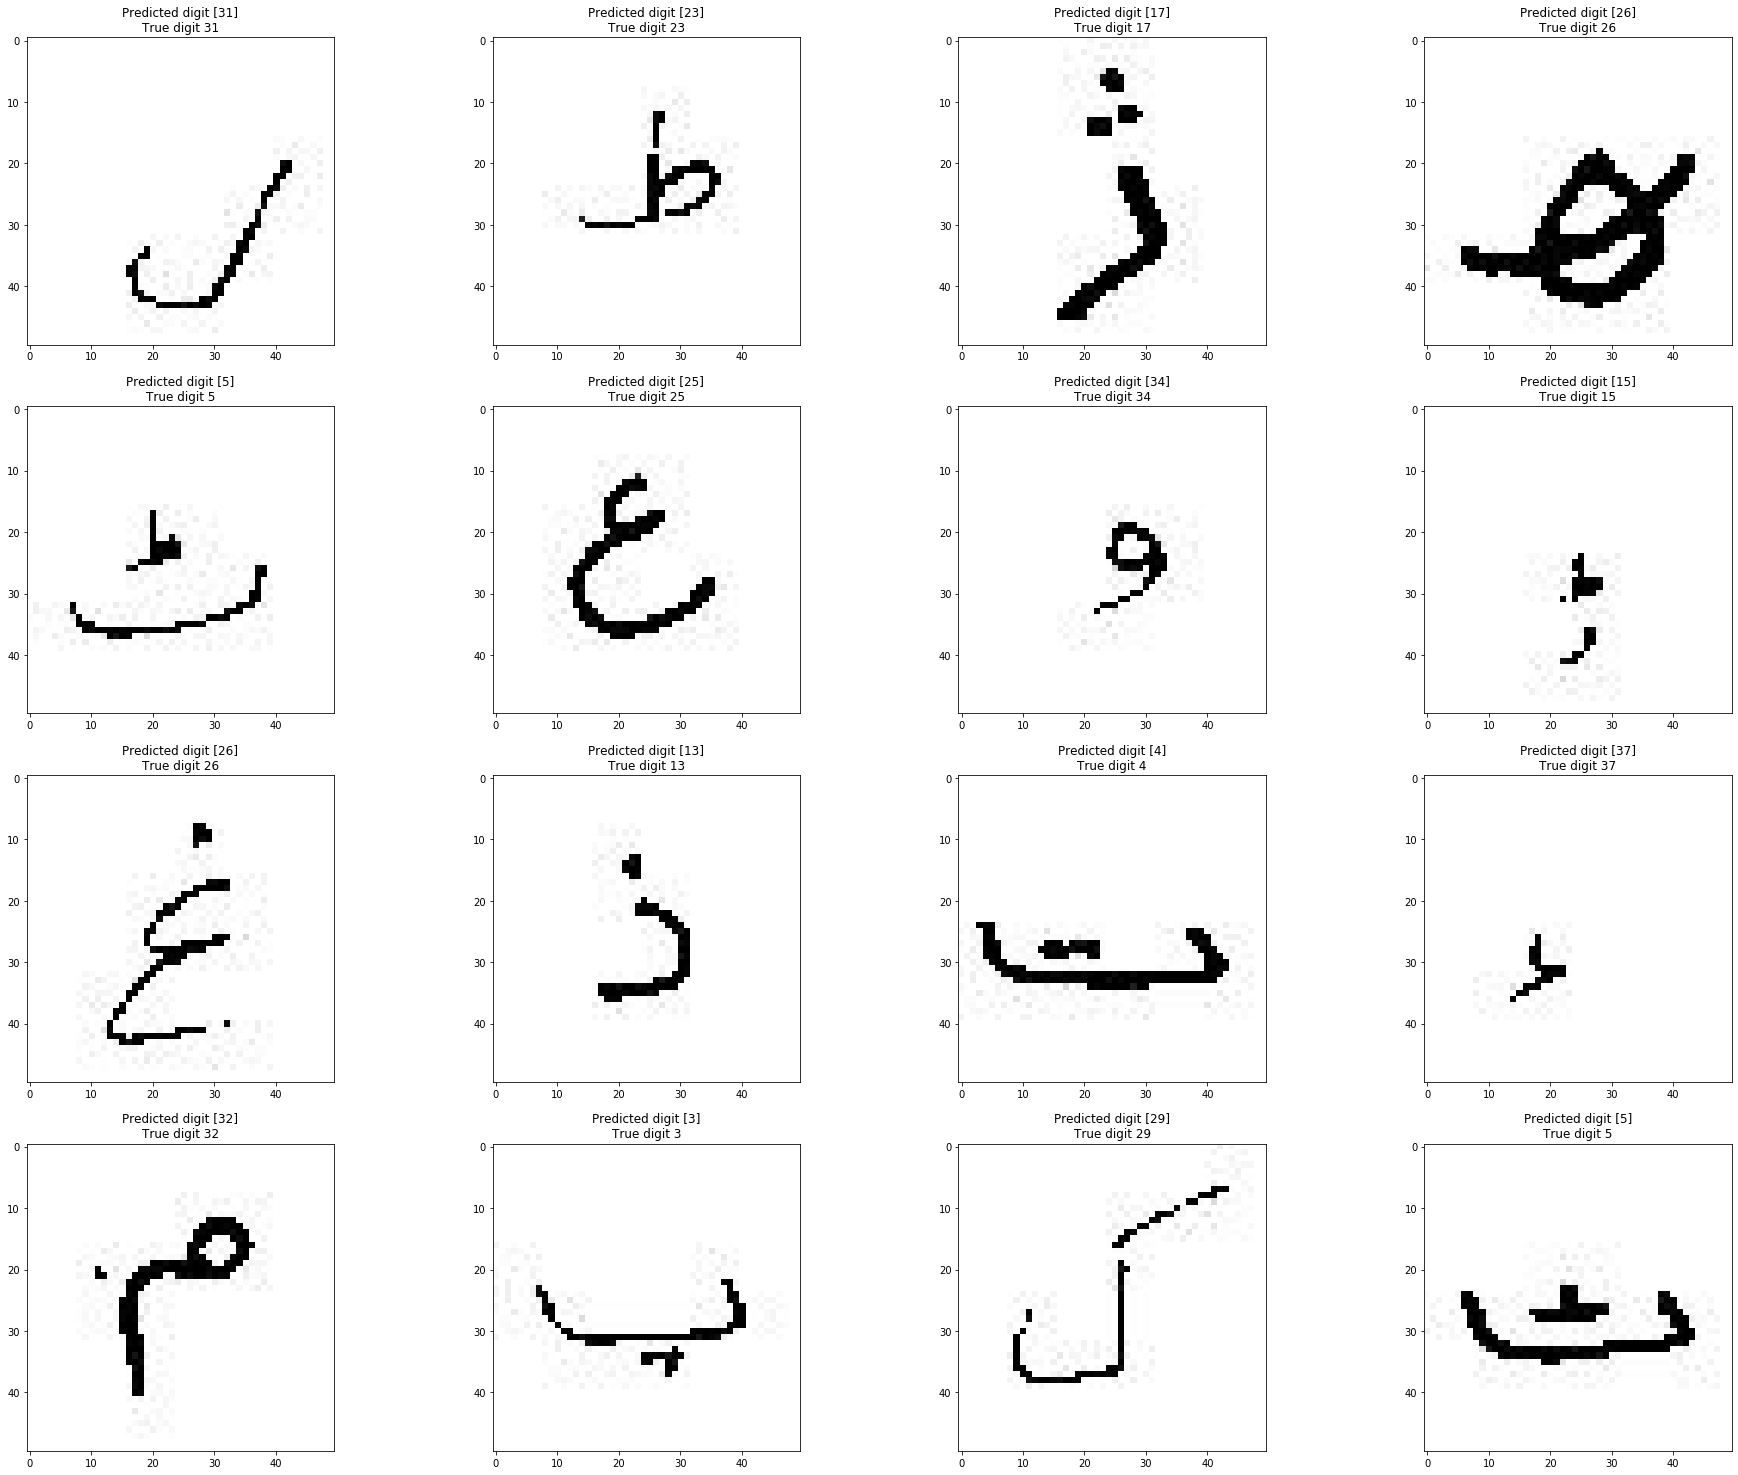

In [94]:
# Convert y_test to numpy array
y_test = np.array(y_test)
# Show 25 digits of data predicted by svm
fig, axis = plt.subplots(4, 4, figsize=(32, 26))

for i, ax in enumerate(axis.flat):
    ax.imshow(x_test[i].reshape(50, 50), cmap='binary')
    #ax.set(title = "SVM : predicted digit is {}".format(predictions[i]))
    ax.set(title = "Predicted digit {0}\nTrue digit {1}".format(tree_predictions[i], y_test[i]))

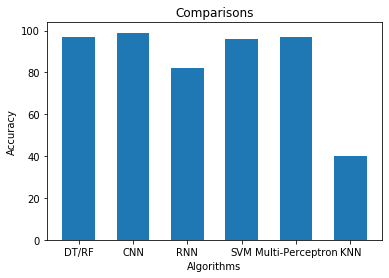

In [117]:
import matplotlib.pyplot as plt 
  
# x-coordinates of left sides of bars  
left = [1, 2, 3, 4, 5, 6] 
  
# heights of bars 
height = [97, 99, 82, 96, 97 ,40] 
  
# labels for bars 
tick_label = ['DT/RF', 'CNN', 'RNN', 'SVM', 'Multi-Perceptron', 'KNN'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.6) 
  
# naming the x-axis 
plt.xlabel('Algorithms') 
# naming the y-axis 
plt.ylabel('Accuracy') 
# plot title 
plt.title('Comparisons') 
  
# function to show the plot 
plt.show()